# Load the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from datetime import datetime
import seaborn as sns

C:\Users\keyur\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# About Dataset
The dataset includes information on air quality and the AQI (Air Quality Index) at the hourly and daily levels from numerous stations located throughout various Indian cities. 
Cities covered in this dataset are Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam.
The dataset for air quality of India is compared with the dataset for air quality in Madrid.


# Loading the Dataset

In [35]:
station_list_india = pd.read_csv("../air-quality-india/stations_india.csv")
station_list_madrid = pd.read_csv("../air-quality-madrid/stations.csv")
city_day = pd.read_csv("../air-quality-india/city_day.csv")
city_hour = pd.read_csv("../air-quality-india/city_hour.csv")
station_day = pd.read_csv("../air-quality-india/station_day.csv")
station_hour = pd.read_csv("../air-quality-india/station_hour.csv")
madrid_2015 = pd.read_csv("../air-quality-madrid/madrid_2015.csv")
madrid_2016 = pd.read_csv("../air-quality-madrid/madrid_2016.csv")
madrid_2017 = pd.read_csv("../air-quality-madrid/madrid_2017.csv")
madrid_2018 = pd.read_csv("../air-quality-madrid/madrid_2018.csv")

In [13]:
station_list_madrid.rename(columns = {'id':'StationId', 'name':'StationName'}, inplace = True)
station_list_madrid['StationId'] = station_list_madrid['StationId'].astype('object')
station_list_india.drop(station_list_india.columns[0], axis=1, inplace=True)

# Merge the data

In [14]:
station_list = pd.concat([station_list_madrid, station_list_india], ignore_index=True, sort=False)

In [4]:
madrid_data = pd.concat([madrid_2015, madrid_2016, madrid_2017, madrid_2018])
madrid_data.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station', 'CH4', 'NOx'],
      dtype='object')

In [38]:
station_hour.rename(columns = {'Datetime':'Date'}, inplace = True)
city_hour.rename(columns = {'Datetime':'Date'}, inplace = True)
india_data = pd.concat([station_day, station_hour, city_hour, city_day])
india_data.drop(station_list_india.columns[0], axis=1, inplace=True)
india_data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status', 'Region', 'Month', 'Year',
       'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday',
       'AQ_Acceptability', 'Day_period'],
      dtype='object')

# Sample Data

In [15]:
station_list.head()

,StationId,StationName,address,lon,lat,elevation,City,State,Status,Region
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635.0,NaN,NaN,NaN,NaN
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670.0,NaN,NaN,NaN,NaN
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708.0,NaN,NaN,NaN,NaN
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693.0,NaN,NaN,NaN,NaN
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604.0,NaN,NaN,NaN,NaN


In [55]:
india_data.head()

,Unnamed: 0,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,...,State,Status,Region,Month,Year,Season,Weekday_or_weekend,Regular_day_or_holiday,AQ_Acceptability,Day_period
0,0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN
1,1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable,NaN
2,2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekend,Regular day,Unacceptable,NaN
3,3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN
4,4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,...,Andhra Pradesh,Active,5. Western,11. Nov,2017,4. Post-Monsoon,Weekday,Regular day,Unacceptable,NaN


In [46]:
madrid_data.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,CH4,NOx
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004,NaN,NaN
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008,NaN,NaN
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011,NaN,NaN
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016,NaN,NaN
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017,NaN,NaN


## Number of rows

In [56]:
station_list.shape

(254, 10)

In [57]:
india_data.shape

(7360725, 29)

In [58]:
madrid_data.shape

(698808, 16)

# Remove NA values from the data as the number of records are more than 7M.

In [39]:
filtered_india_data = india_data.dropna()
filtered_madrid_data = madrid_data.dropna()

# Save the filtered data into csv file

In [40]:
station_list.to_csv('../merged_stations.csv', index=False)
filtered_india_data.to_csv('../filtered_india_data.csv', index=False)
filtered_madrid_data.to_csv('../filtered_madrid_data.csv', index=False)

In [48]:
station_list = pd.read_csv("../merged_stations.csv")
filtered_india_data = pd.read_csv("../filtered_india_data.csv")
filtered_madrid_data = pd.read_csv("../filtered_madrid_data.csv")

## Columns in Datasets

In [42]:
station_list.columns

Index(['StationId', 'StationName', 'address', 'lon', 'lat', 'elevation',
       'City', 'State', 'Status', 'Region'],
      dtype='object')

In [43]:
india_data.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status', 'Region', 'Month', 'Year',
       'Season', 'Weekday_or_weekend', 'Regular_day_or_holiday',
       'AQ_Acceptability', 'Day_period'],
      dtype='object')

In [20]:
madrid_data.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station', 'CH4', 'NOx'],
      dtype='object')

# Descriptive statistics for numerical fields in Datasets

In [63]:
filtered_india_data.describe()

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,7.360725e+06,6.069697e+06,4.730506e+06,6.276534e+06,6.300921e+06,6.450825e+06,4.797621e+06,6.589653e+06,5.947634e+06,5.959825e+06,5.968232e+06,5.560459e+06,2.635136e+06,6.170755e+06,7.360725e+06
mean,1.819986e+06,8.632343e+01,1.700344e+02,2.524522e+01,3.748860e+01,4.280135e+01,3.229840e+01,1.581000e+00,1.287080e+01,4.067447e+01,3.077682e+00,1.254262e+01,2.069093e+00,1.924205e+02,2.017708e+03
std,1.239945e+06,8.903990e+01,1.364677e+02,4.388716e+01,3.106903e+01,4.956152e+01,2.659739e+01,5.333143e+00,1.360911e+01,3.751305e+01,9.477549e+00,2.331151e+01,6.461928e+00,1.356323e+02,1.577901e+00
min,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,2.015000e+03
25%,7.727380e+05,3.150000e+01,7.200000e+01,4.770000e+00,1.642000e+01,1.414000e+01,1.513000e+01,4.800000e-01,5.260000e+00,1.686000e+01,2.700000e-01,9.500000e-01,0.000000e+00,9.000000e+01,2.016000e+03
50%,1.692828e+06,5.756000e+01,1.288600e+02,1.017000e+01,2.917000e+01,2.712000e+01,2.805000e+01,8.800000e-01,9.400000e+00,3.081000e+01,1.440000e+00,4.830000e+00,3.600000e-01,1.480000e+02,2.018000e+03
75%,2.636755e+06,1.079700e+02,2.292900e+02,2.405000e+01,4.951000e+01,5.128000e+01,4.136000e+01,1.420000e+00,1.575000e+01,5.455000e+01,3.410000e+00,1.517000e+01,1.880000e+00,2.850000e+02,2.019000e+03
max,4.476936e+06,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,4.999900e+02,3.133000e+03,2.020000e+03


In [7]:
filtered_madrid_data.describe()

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station,CH4,NOx
count,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8.689000e+03,8689.000000,8689.000000
mean,0.801036,0.372034,0.425181,0.076008,31.262055,50.762228,35.312579,13.945794,8.939118,4.844516,1.401977,2.965474,2.807902e+07,1.326583,98.692945
std,0.852602,0.267247,0.725692,0.073178,56.260790,35.349115,26.581070,11.359638,7.531233,3.316953,0.244807,4.378955,7.947406e+00,0.215042,116.100869
min,0.100000,0.100000,0.100000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.030000,0.100000,2.807901e+07,0.020000,2.000000
25%,0.400000,0.200000,0.100000,0.040000,2.000000,24.000000,10.000000,5.000000,3.000000,3.000000,1.230000,0.700000,2.807901e+07,1.160000,29.000000
50%,0.600000,0.300000,0.200000,0.060000,11.000000,47.000000,32.000000,11.000000,7.000000,4.000000,1.400000,1.700000,2.807901e+07,1.340000,67.000000
75%,1.000000,0.400000,0.500000,0.090000,36.000000,71.000000,56.000000,20.000000,13.000000,6.000000,1.480000,3.600000,2.807902e+07,1.420000,126.000000
max,19.600000,4.900000,16.700001,1.420000,879.000000,349.000000,140.000000,80.000000,58.000000,32.000000,4.120000,84.800003,2.807902e+07,3.920000,1681.000000


# Datatypes of fields

In [65]:
station_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    24 non-null     object 
 1   StationName  254 non-null    object 
 2   address      24 non-null     object 
 3   lon          24 non-null     float64
 4   lat          24 non-null     float64
 5   elevation    24 non-null     float64
 6   City         230 non-null    object 
 7   State        230 non-null    object 
 8   Status       230 non-null    object 
 9   Region       230 non-null    object 
dtypes: float64(3), object(7)
memory usage: 20.0+ KB


In [49]:
filtered_india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680841 entries, 0 to 1680840
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   StationId               1680841 non-null  object 
 1   Date                    1680841 non-null  object 
 2   PM2.5                   1680841 non-null  float64
 3   PM10                    1680841 non-null  float64
 4   NO                      1680841 non-null  float64
 5   NO2                     1680841 non-null  float64
 6   NOx                     1680841 non-null  float64
 7   NH3                     1680841 non-null  float64
 8   CO                      1680841 non-null  float64
 9   SO2                     1680841 non-null  float64
 10  O3                      1680841 non-null  float64
 11  Benzene                 1680841 non-null  float64
 12  Toluene                 1680841 non-null  float64
 13  Xylene                  1680841 non-null  float64
 14  AQ

In [8]:
filtered_madrid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8689 entries, 87457 to 69078
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8689 non-null   object 
 1   BEN      8689 non-null   float64
 2   CO       8689 non-null   float64
 3   EBE      8689 non-null   float64
 4   NMHC     8689 non-null   float64
 5   NO       8689 non-null   float64
 6   NO_2     8689 non-null   float64
 7   O_3      8689 non-null   float64
 8   PM10     8689 non-null   float64
 9   PM25     8689 non-null   float64
 10  SO_2     8689 non-null   float64
 11  TCH      8689 non-null   float64
 12  TOL      8689 non-null   float64
 13  station  8689 non-null   int64  
 14  CH4      8689 non-null   float64
 15  NOx      8689 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.1+ MB


# Check null values in dataset
#### Below command will show number of null values

In [10]:
station_list.isnull().sum()

id             230
name           230
address        230
lon            230
lat            230
elevation      230
Unnamed: 0      24
StationId       24
StationName     24
City            24
State           24
Status          24
Region          24
dtype: int64

In [12]:
india_data.isnull().sum()

Unnamed: 0                      0
StationId                       0
Date                            0
PM2.5                     1291028
PM10                      2630219
NO                        1084191
NO2                       1059804
NOx                        909900
NH3                       2563104
CO                         771072
SO2                       1413091
O3                        1400900
Benzene                   1392493
Toluene                   1800266
Xylene                    4725589
AQI                       1189970
AQI_Bucket                      0
StationName                     0
City                            0
State                           0
Status                          0
Region                          0
Month                           0
Year                            0
Season                          0
Weekday_or_weekend              0
Regular_day_or_holiday          0
AQ_Acceptability                0
Day_period                 294705
dtype: int64

In [80]:
madrid_data.isnull().sum()

date            0
BEN        529863
CO         410383
EBE        530589
NMHC       613170
NO           3498
NO_2         3498
O_3        294590
PM10       352119
PM25       526910
SO_2       410498
TCH        613170
TOL        530453
station         0
CH4        683958
NOx        577164
dtype: int64

# Finding outliers from the data

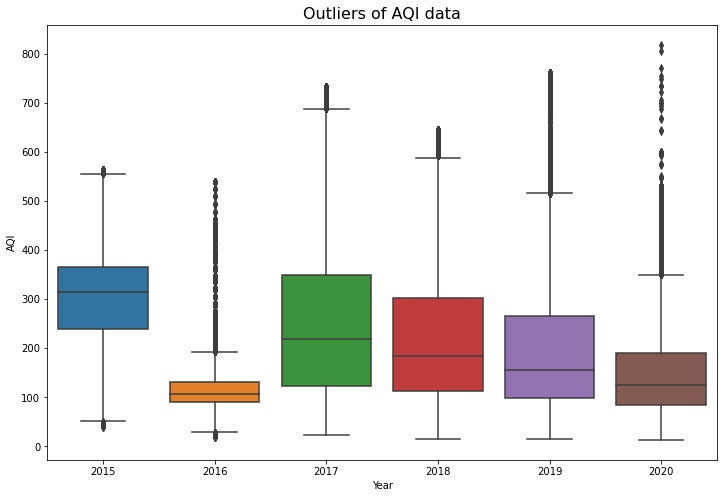

In [13]:
columns = 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'
col = 'AQI'
plt.figure(figsize=(12,8))
a = sns.boxplot(x= 'Year', y = col, data= filtered_india_data)
a.set_title(f"Outliers of {col} data", fontsize=16)
display()

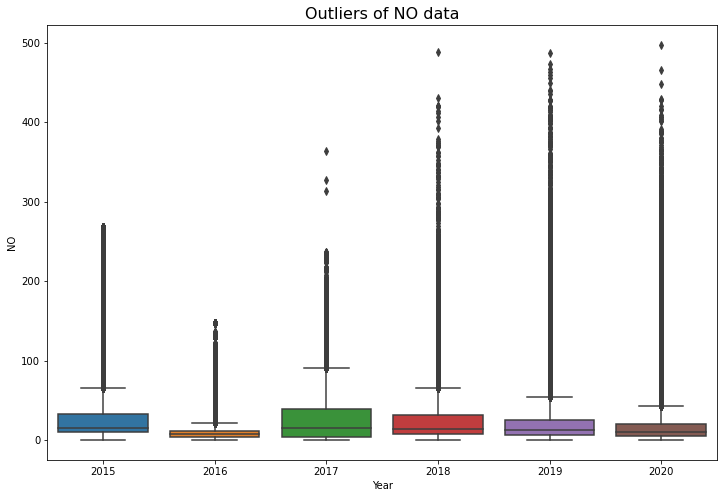

In [14]:
col = 'NO'
plt.figure(figsize=(12,8))
a = sns.boxplot(x= 'Year', y = col, data= filtered_india_data)
a.set_title(f"Outliers of {col} data", fontsize=16)
display()

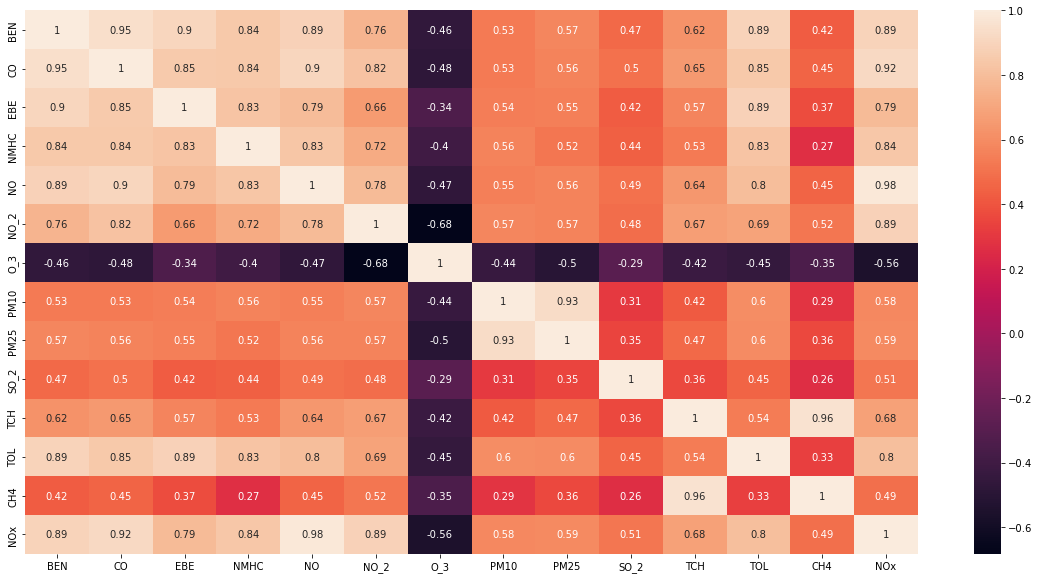

In [15]:
madrid_data_heatmap = filtered_madrid_data.drop(['station'], axis = 1)
plt.figure(figsize=(20,10))
sns.heatmap(madrid_data_heatmap.corr(),annot=True)
plt.show()

In [21]:
filtered_india_data['V_P_C'] = filtered_india_data['PM2.5']+filtered_india_data['PM10']+filtered_india_data['NO']+filtered_india_data['NO2']+filtered_india_data['NOx']+filtered_india_data['NH3']+filtered_india_data['CO']
filtered_india_data['I_P_C'] = filtered_india_data['SO2']+filtered_india_data['O3']+filtered_india_data['Benzene']+filtered_india_data['Toluene']+filtered_india_data['Xylene']

In [22]:
most_polluted_citites = filtered_india_data.groupby(['City']).agg({'I_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_industry = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_industry.append({'City' : row[0], 'I_P_C': row[1]})
most_polluted_citites_by_industry = pd.DataFrame(most_polluted_citites_by_industry)
most_polluted_citites_by_industry = most_polluted_citites_by_industry.dropna()

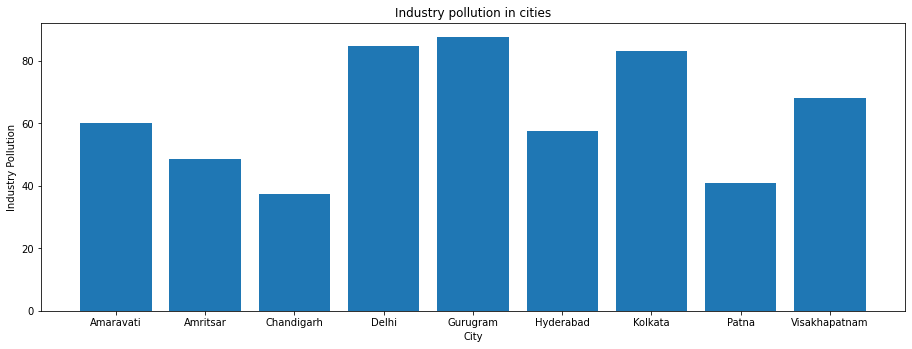

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(most_polluted_citites_by_industry['City'], most_polluted_citites_by_industry['I_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Industry Pollution')
ax.set_title('Industry pollution in cities')
plt.show()

In [24]:
most_polluted_citites = filtered_india_data.groupby(['City']).agg({'V_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_vehicle = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_vehicle.append({'City' : row[0], 'V_P_C': row[1]})
most_polluted_citites_by_vehicle = pd.DataFrame(most_polluted_citites_by_vehicle)
most_polluted_citites_by_vehicle = most_polluted_citites_by_vehicle.dropna()

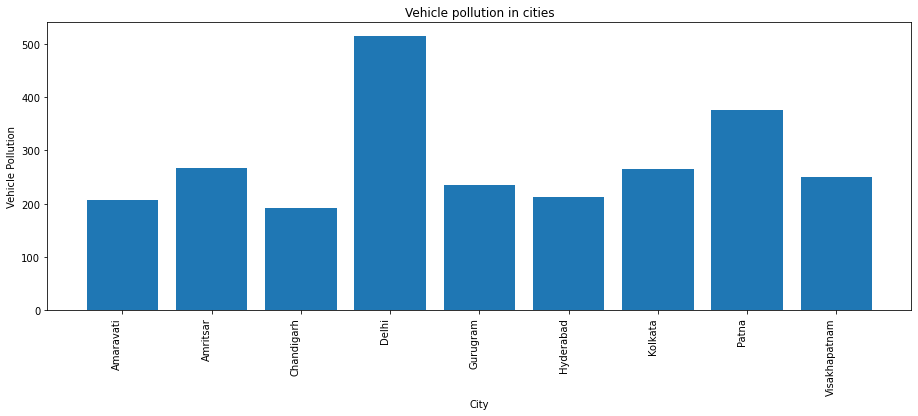

<Figure size 864x576 with 0 Axes>

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.figure(figsize=(12,8))
ax.bar(most_polluted_citites_by_vehicle['City'], most_polluted_citites_by_vehicle['V_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Vehicle Pollution')
ax.set_title('Vehicle pollution in cities')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

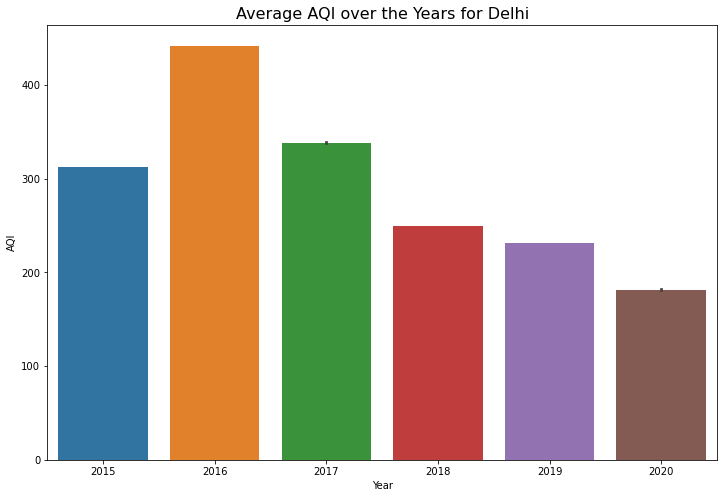

In [26]:
col = 'Delhi'
plt.figure(figsize=(12,8))
x= filtered_india_data[filtered_india_data['City']==col]
sns.barplot(x='Year', y='AQI', data=x, palette ='tab10')
plt.title(f"Average AQI over the Years for {col}", fontsize=16)
plt.xlabel('Year')
plt.ylabel('AQI')
display()

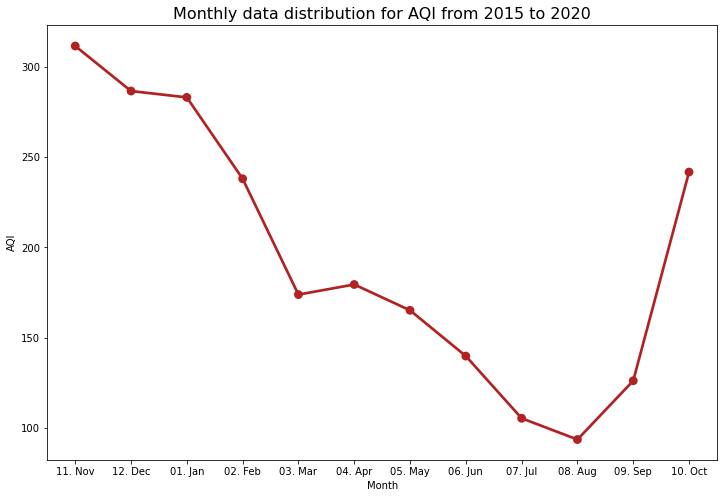

In [27]:
plt.figure(figsize=(12,8))
a = sns.pointplot(x= "Month", y= 'AQI', data=filtered_india_data, color='firebrick')
a.set_title(f"Monthly data distribution for AQI from 2015 to 2020", fontsize=16)
display()

<AxesSubplot:xlabel='AQI', ylabel='NO2'>

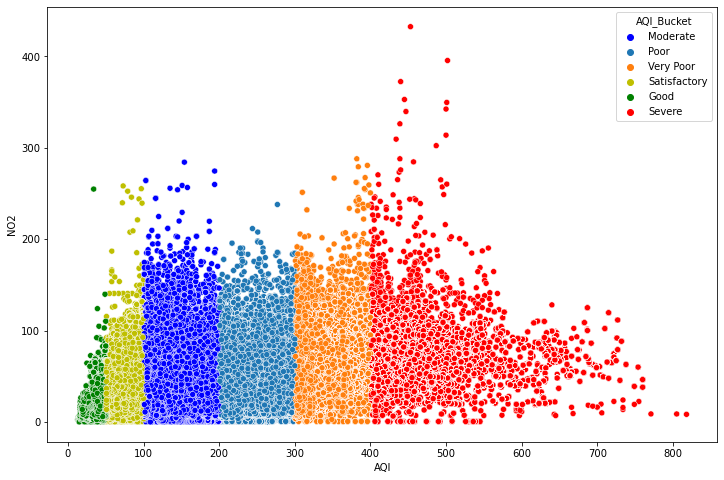

In [28]:
plt.figure(figsize=(12,8))
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO2', data=filtered_india_data,hue ='AQI_Bucket',palette = palette, ci= None)

In [56]:
filtered_india_data.index = pd.to_datetime(filtered_india_data.index)
df_CO_2019_04 = df_CO.loc['2019-04-01':'2019-04-10']
df_CO_2020_04 = df_CO.loc['2020-04-01':'2020-04-10']

df_CO_2019_04['Month'] = "03"
df_CO_2020_04['Month'] = "04"

df_CO_04 = pd.concat([df_CO_2019_04,df_CO_2020_04])

NameError: name 'df_CO' is not defined

In [54]:
sns.set(style="whitegrid")

g = sns.catplot(x="Month", y="Ahmedabad", data=df_CO_04,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("CO LEVEL")

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Ahmedabad April 2019 vs 2020",fontsize=20);

NameError: name 'df_CO_04' is not defined

<Figure size 864x576 with 0 Axes>

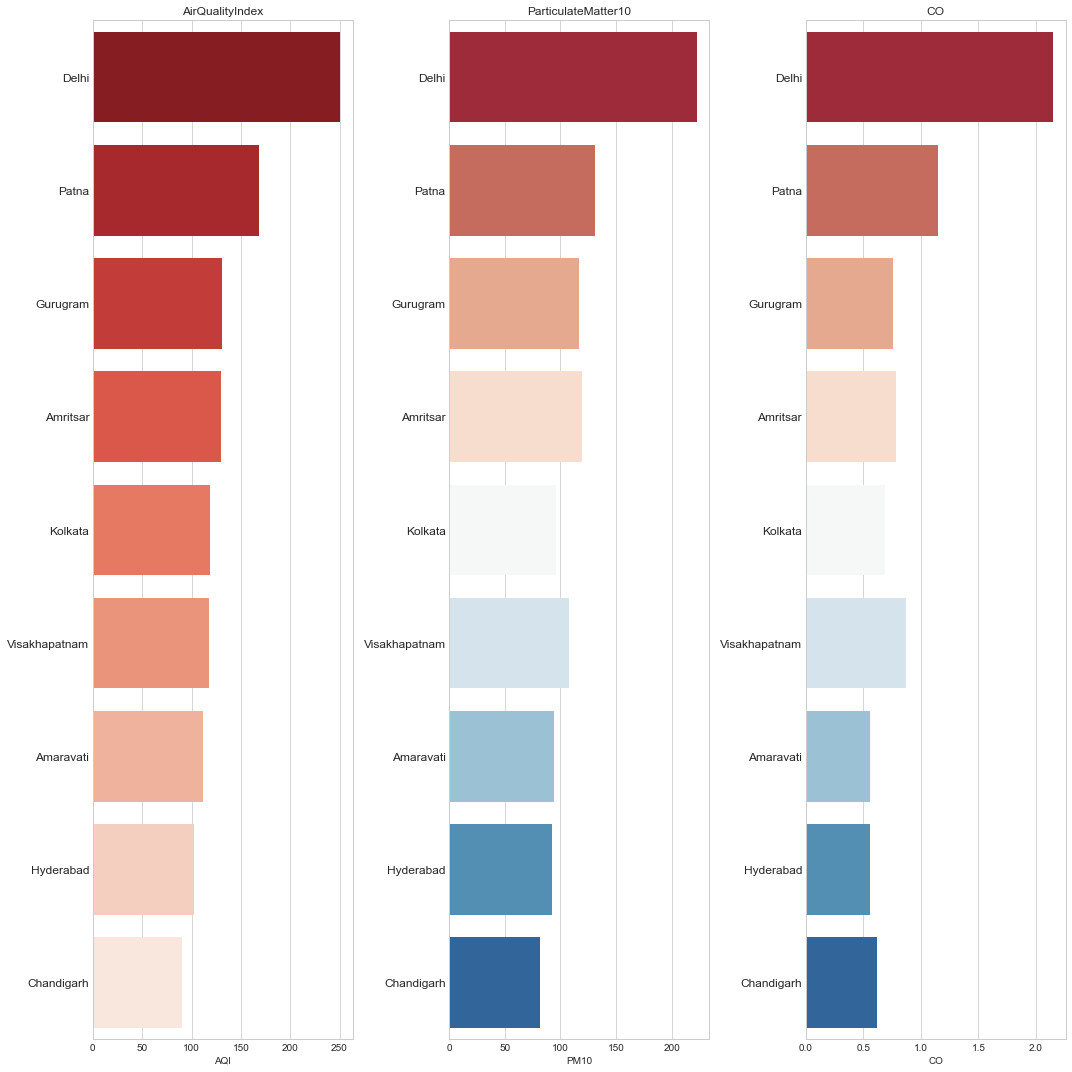

In [32]:
most_polluted = filtered_india_data[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 12);
    ax_[i].set_title(titles[i])
    f.tight_layout()